AML Project Review 2 Column 1-17 Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import files 
uploadfile = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import io
hospital_ds = pd.read_csv(io.BytesIO(uploadfile['dataset.csv']))

In [ ]:
hospital_ds.shape

(91713, 85)

The first 3 columns are encounter ID , patient ID and hospital ID. These cannot be used as predictors and hence we can drop these columns

In [ ]:
hospital_ds.drop(columns=hospital_ds.columns[:3],axis=1, inplace=True)

In [ ]:
#The percentage of missing values in each column is given by:
miss_values = hospital_ds.isnull().sum() * 100 / len(hospital_ds)
print("The percentage of the missing value for the data set columns are : ")
print(miss_values)

The percentage of the missing value for the data set columns are : 
age                              4.610033
bmi                              3.738837
elective_surgery                 0.000000
ethnicity                        1.521049
gender                           0.027259
                                  ...    
solid_tumor_with_metastasis      0.779606
apache_3j_bodysystem             1.812175
apache_2_bodysystem              1.812175
Unnamed: 83                    100.000000
hospital_death                   0.000000
Length: 82, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


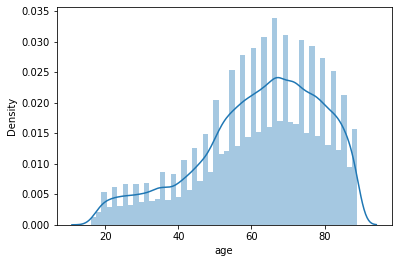

In [ ]:
sns.distplot(hospital_ds.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


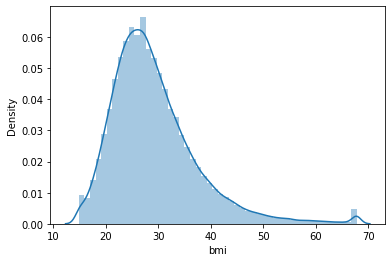

In [ ]:
sns.distplot(hospital_ds.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


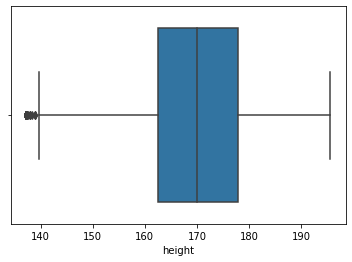

In [ ]:
sns.boxplot(hospital_ds.height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


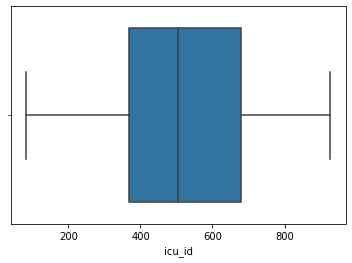

In [ ]:
sns.boxplot(hospital_ds.icu_id)

From the above examples, we can conclude that it is best to replace the missing values in the numerical features with the median.

[Text(0, 0.5, 'Number of Patients'),
 Text(0.5, 0, 'Elective Surgery'),
 Text(0.5, 1.0, 'Comparison of Categorical Variable(elective_surgery) vs Target variable')]

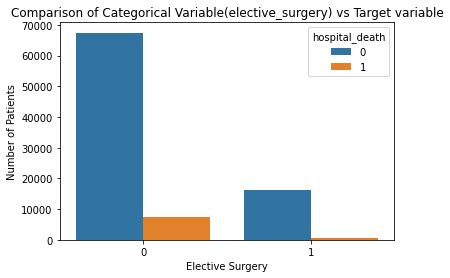

In [ ]:
p1 = sns.countplot(data=hospital_ds, x='elective_surgery', hue='hospital_death')
p1.set( xlabel = "Elective Surgery", ylabel = "Number of Patients", title='Comparison of Categorical Variable(elective_surgery) vs Target variable')

[Text(0, 0.5, 'Number of Patients'),
 Text(0.5, 0, 'Ethnicity'),
 Text(0.5, 1.0, 'Comparison of Categorical Variable(ethnicity) vs Target variable')]

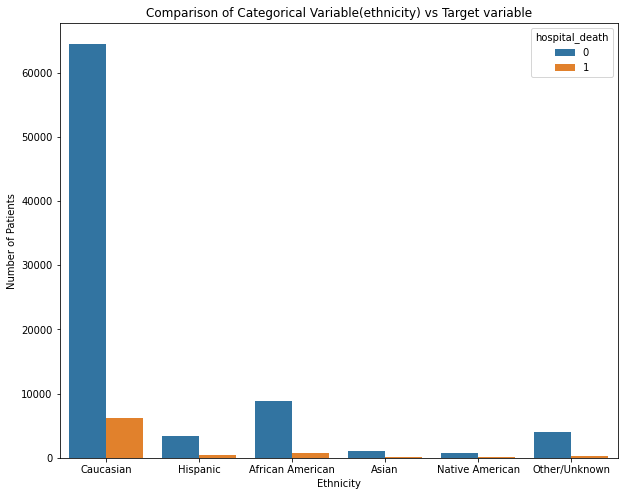

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
p2 = sns.countplot(data=hospital_ds, x='ethnicity', hue='hospital_death')
p2.set( xlabel = "Ethnicity", ylabel = "Number of Patients", title='Comparison of Categorical Variable(ethnicity) vs Target variable')

[Text(0, 0.5, 'Number of Patients'),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Comparison of Categorical Variable(gender) vs Target variable')]

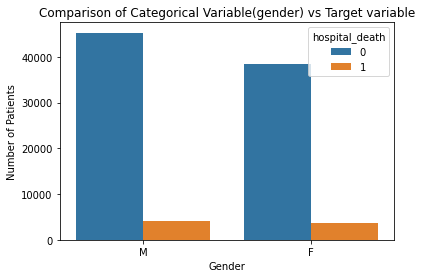

In [ ]:
p3 = sns.countplot(data=hospital_ds, x='gender', hue='hospital_death')
p3.set( xlabel = "Gender", ylabel = "Number of Patients", title='Comparison of Categorical Variable(gender) vs Target variable')

[Text(0, 0.5, 'Number of Patients'),
 Text(0.5, 0, 'Admission source'),
 Text(0.5, 1.0, 'Comparison of Categorical Variable(Amission Source) vs Target variable')]

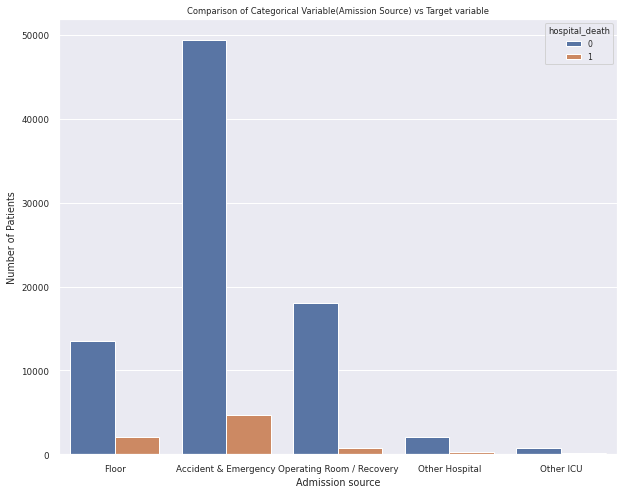

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=0.7)
p4 = sns.countplot(data=hospital_ds, x='icu_admit_source', hue='hospital_death')
p4.set( xlabel = "Admission source", ylabel = "Number of Patients", title='Comparison of Categorical Variable(Amission Source) vs Target variable')

[Text(0, 0.5, 'Number of Patients'),
 Text(0.5, 0, 'Icu type'),
 Text(0.5, 1.0, 'Comparison of Categorical Variable(Icu Type) vs Target variable')]

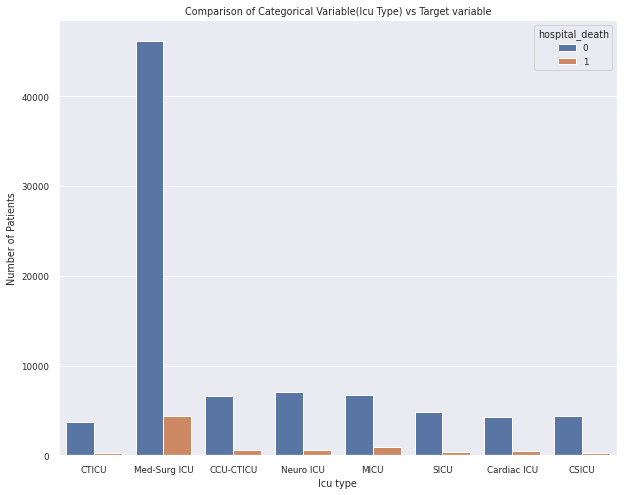

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
p5 = sns.countplot(data=hospital_ds, x='icu_type', hue='hospital_death')
p5.set( xlabel = "Icu type", ylabel = "Number of Patients", title='Comparison of Categorical Variable(Icu Type) vs Target variable')

From the above graphs , we can observe that the categorical variables can be replaced by the mode (The most frequently occuring data).

Creating a list of all numerical features in the data set:

In [ ]:
numerical_features=[]
for col in hospital_ds.columns:
    if (hospital_ds[col].dtype==int)or (hospital_ds[col].dtype==float):
        numerical_features.append(col)

Replacing all missing values with median:

In [ ]:
for col in hospital_ds.columns:
    if col in numerical_features :
        hospital_ds[col].fillna(hospital_ds[col].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Creating a list of all categorical features in the data set:

In [ ]:
categorical_features1=[]
for col in hospital_ds.columns:
    if  (hospital_ds[col].dtype==object):
        categorical_features1.append(col)
print(categorical_features1)

['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


Replacing all missing values with mode:

In [ ]:
for col in hospital_ds.columns:
    if col in categorical_features1:
        hospital_ds[col].fillna(hospital_ds[col].mode(), inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

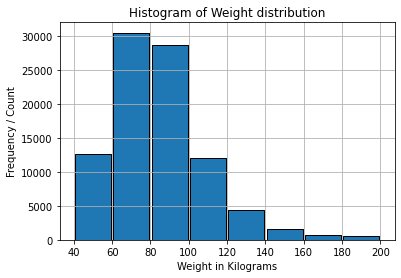

In [ ]:
x_bins=[40,60,80,100,120,140,160,180,200]
hospital_ds.hist(column='weight',bins=x_bins, edgecolor='black',rwidth = 0.94)
plt.xticks(x_bins)
plt.xlabel('Weight in Kilograms')
plt.ylabel('Frequency / Count')
plt.title('Histogram of Weight distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

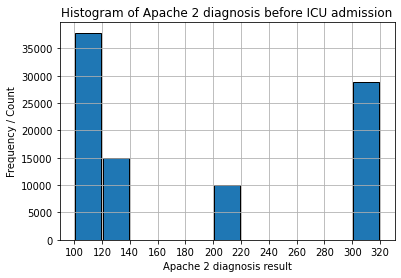

In [ ]:
x_bins=[100,120,140,160,180,200,220,240,260,280,300,320]
hospital_ds.hist(column='apache_2_diagnosis',bins=x_bins, edgecolor='black',rwidth = 0.94)
plt.xticks(x_bins)
plt.xlabel('Apache 2 diagnosis result')
plt.ylabel('Frequency / Count')
plt.title('Histogram of Apache 2 diagnosis before ICU admission')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

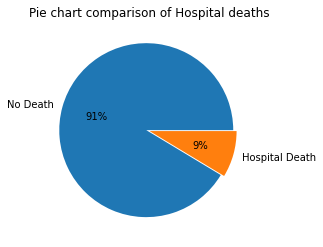

In [ ]:
df_count = hospital_ds['hospital_death'].value_counts()
class_label =["No Death","Hospital Death"]
split = (0.04, 0)
plt.pie(df_count , labels=class_label,explode=split,autopct='%1.0f%%')
plt.title('Pie chart comparison of Hospital deaths')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


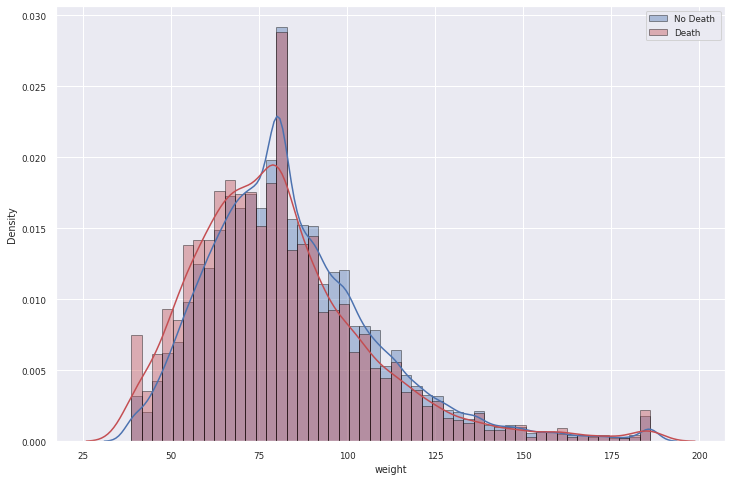

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(hospital_ds['weight'][hospital_ds['hospital_death']==0],color='b', label='No Death ',hist_kws={'edgecolor':'black'})
_=sns.distplot(hospital_ds['weight'][hospital_ds['hospital_death']==1],color='r',label='Death',hist_kws={'edgecolor':'black'})
plt.legend()
plt.show()       

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


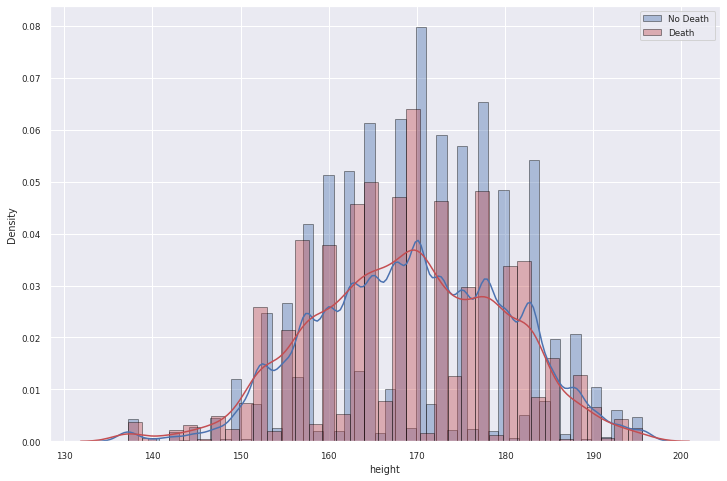

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(hospital_ds['height'][hospital_ds['hospital_death']==0],color='b', label='No Death ',hist_kws={'edgecolor':'black'})
_=sns.distplot(hospital_ds['height'][hospital_ds['hospital_death']==1],color='r',label='Death',hist_kws={'edgecolor':'black'})
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


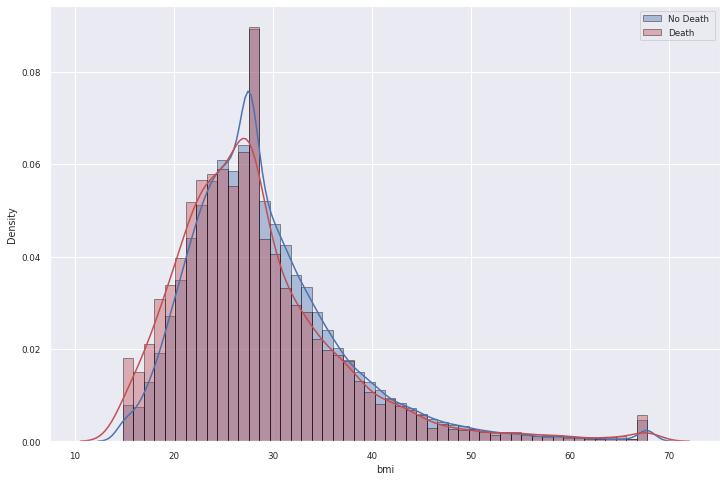

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(hospital_ds['bmi'][hospital_ds['hospital_death']==0],color='b', label='No Death ',hist_kws={'edgecolor':'black'})
_=sns.distplot(hospital_ds['bmi'][hospital_ds['hospital_death']==1],color='r',label='Death',hist_kws={'edgecolor':'black'})
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


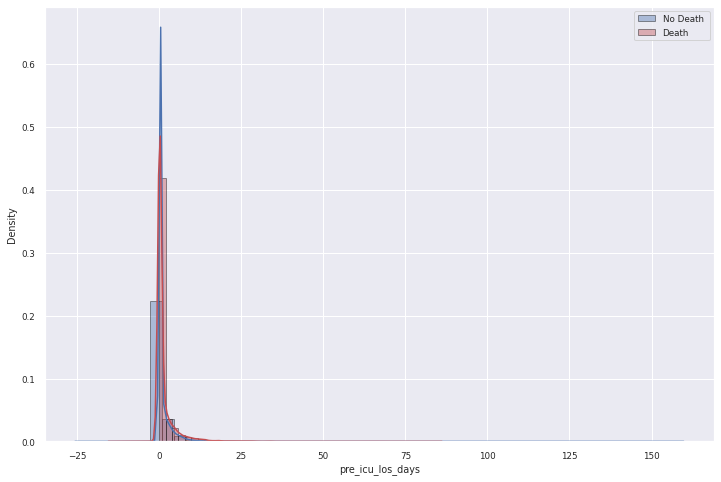

In [ ]:

plt.figure(figsize=(12,8))
sns.distplot(hospital_ds['pre_icu_los_days'][hospital_ds['hospital_death']==0],color='b', label='No Death ',hist_kws={'edgecolor':'black'})
_=sns.distplot(hospital_ds['pre_icu_los_days'][hospital_ds['hospital_death']==1],color='r',label='Death',hist_kws={'edgecolor':'black'})
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(hospital_ds[['age','gender','hospital_death','bmi']].dropna(), x="age", y="hospital_death", color="gender", hover_data=hospital_ds[['age','gender','hospital_death','bmi']].columns)
fig.show()

Let's prepare a heat map to find the corelation in the data

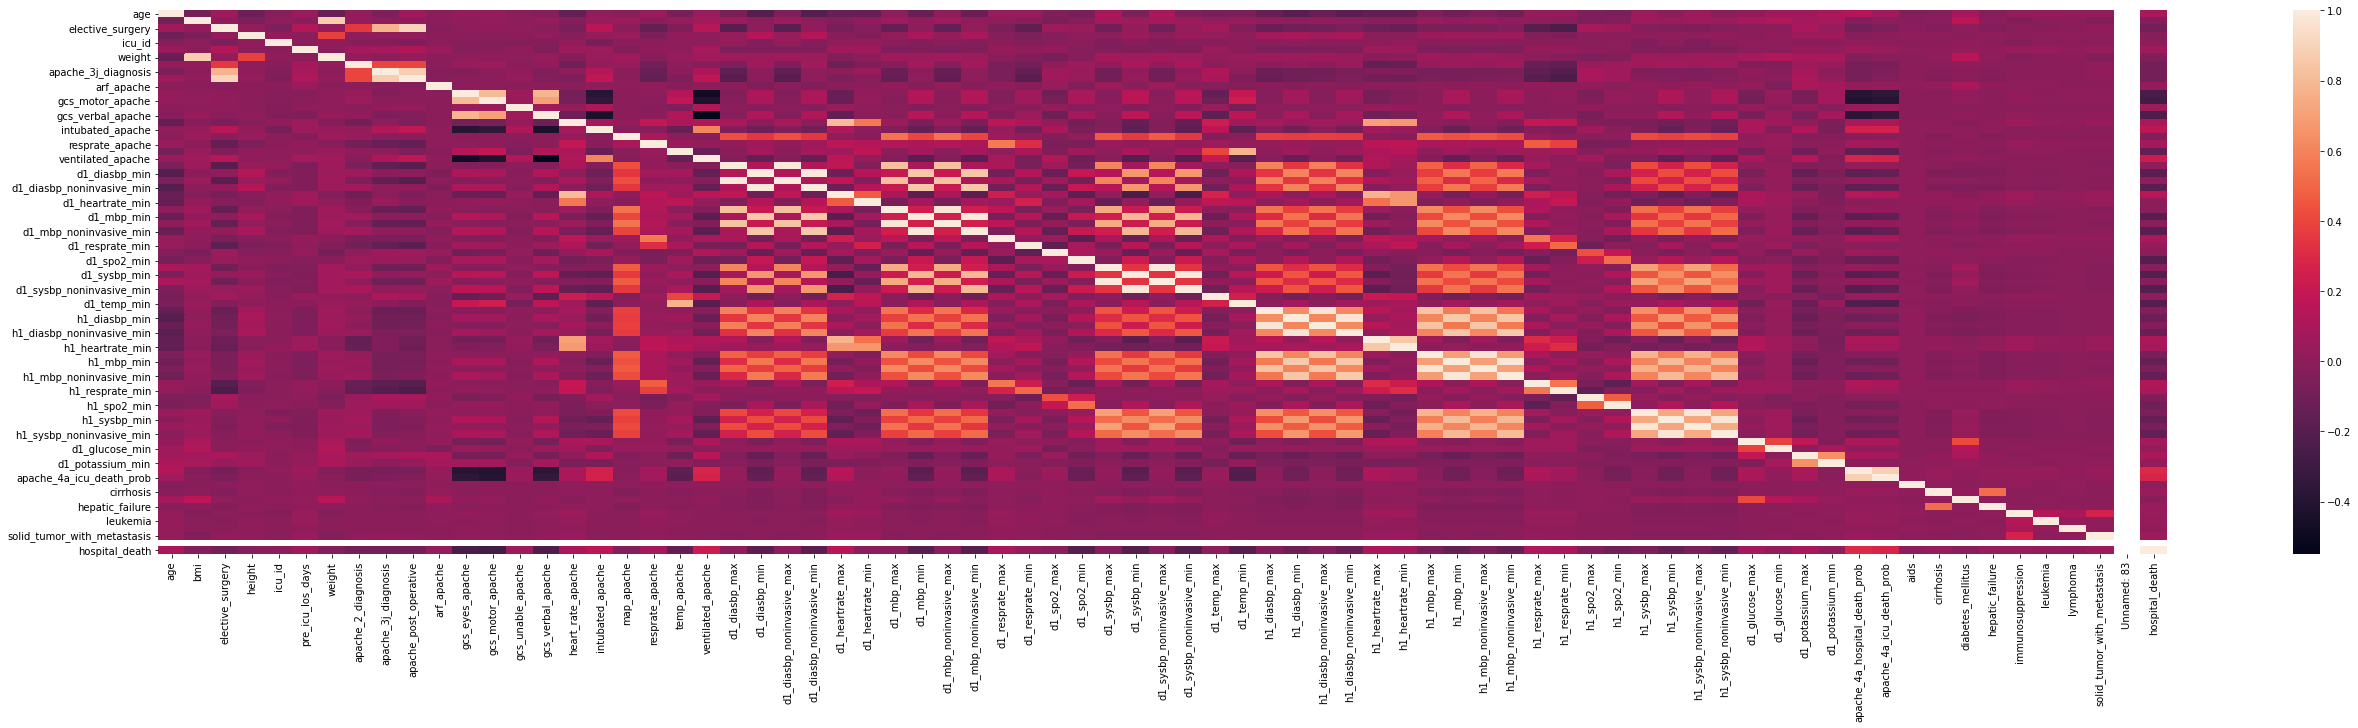

In [ ]:
plt.figure(figsize=(45,10))
sns.heatmap(hospital_ds.corr())

Now we will leverage the heat map to find the highly corelated columns

In [ ]:
names=[]
corr_mat = hospital_ds.corr()
for i in range(len(corr_mat.columns)):
  for j in range(i):
    if (abs(corr_mat.iloc[i, j])>=0.9):
      nam=corr_mat.columns[i]
      names.append(nam)
names

#The below mentioned columns are the columns that are highly corelated and can be dropped

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min']